In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("ventas_cat.xlsx")
df

,id,fecha,producto,cliente,cantidad,total,vendedor,categorizacion,client_id
0,987170,2025-05-15,Refill de 20 Litros Suavizante Fresco Amanecer,Rodny Gardon,11,1155.0,Lusvin Samayoa,Suavizante,1
1,985862,2025-05-14,Refill de 20 Litros Suavizante Fresco Amanecer,Marina Elcira Sanchez Anzueto de Santiago,1,105.0,Lusvin Samayoa,Suavizante,2
2,964950,2025-04-05,Refill de 20 Litros Suavizante Fresco Amanecer,Marina Elcira Sanchez Anzueto de Santiago,1,105.0,Lusvin Samayoa,Suavizante,2
3,985862,2025-05-14,Refill de 20 Litros de Suavizante Floral,Marina Elcira Sanchez Anzueto de Santiago,1,105.0,Lusvin Samayoa,Suavizante,2
4,964950,2025-04-05,Refill de 20 Litros de Suavizante Floral,Marina Elcira Sanchez Anzueto de Santiago,2,210.0,Lusvin Samayoa,Suavizante,2
...,...,...,...,...,...,...,...,...,...
1804,60127,2021-06-10,Lavadora carga superior 53Lb,Maria Garcia,1,2300.0,Lusvin Samayoa,Lavadora,342
1805,60107,2021-06-09,Refrigeradora 18 pies,Denis Archila,1,4300.0,Katheryn Celeste Rosales Monzon,Refrigeradora,343
1806,60067,2021-06-09,Ecofiltro,Edwin Arturo Retana Rodriguez,1,250.0,Lesly Yasmin Gabriela Ramos,Cocina,344
1807,60041,2021-06-09,"Televisor LED 32""",Gerber Emilio Lemus Lopez,1,2432.0,Lusvin Samayoa,TV,345


In [3]:
df = df[df["fecha"].dt.year == 2025]
agrupar = (df.groupby(["cliente","categorizacion"])[["total","cantidad"]]  # Changed from ("total","cantidad") to ["total","cantidad"]
           .sum()
           .sort_values(by="total",ascending=False)
           .head(10)
           .reset_index()
          )
agrupar

,cliente,categorizacion,total,cantidad
0,Evelyn Esmeralda Segovia Mendizábal,Suavizante,11400.0,95
1,Evelyn Esmeralda Segovia Mendizábal,Detergente,10065.0,93
2,Candelaria Ruiz Caballos de Pinzon,Lavadora,7788.0,1
3,Juan Francisco Girón Solorzano,Lavadora,6888.0,1
4,Cristian Daniel Icute Pineda,PC,6714.0,1
5,TALE PEREZ ANSELMO ESTUARDO,Prestamo,6400.0,1
6,Edilburga Canel Cordero de Santos,Cama,6240.0,1
7,VÁSQUEZ CORTEZ JULIO ALEJANDRO,TV,6180.0,1
8,Evelin Carolina Peréz Mendoza,TV,5680.0,1
9,Reina Isabel Cardona Marroquin,TV,5600.0,1


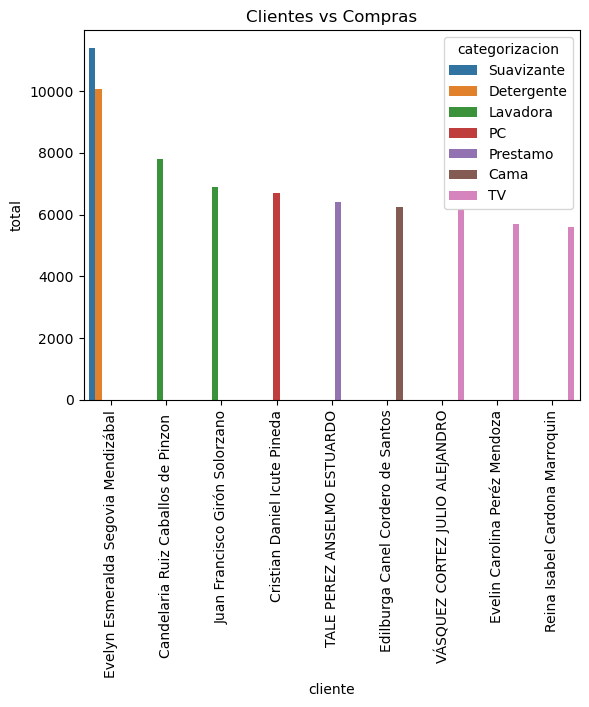

In [4]:
sns.barplot(data=agrupar, x="cliente", y="total", hue="categorizacion")
plt.title("Clientes vs Compras")
plt.xticks(rotation=90)
plt.show()

In [5]:
# histograma de gastos por cliente
df_compras = df.groupby(["cliente"])["total"].sum().reset_index()
df_compras

,cliente,total
0,Albaro Lopez,67.00000
1,Alejandro Estrada,33.00000
2,"Angel Valle ""LAVANDERIA VALLE""",970.00000
3,Angelica Pineda,280.00000
4,Angelica de Vara,240.00000
...,...,...
158,Zulma Canté,53.00000
159,ana valenzuela,16.00000
160,angela pineda,8.00000
161,cliente pendiente (gatitos),24.00000


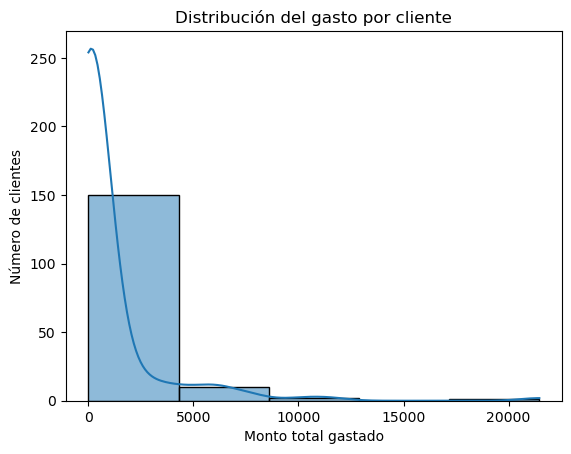

In [6]:
sns.histplot(df_compras['total'], bins=5, kde=True)
plt.title('Distribución del gasto por cliente')
plt.xlabel('Monto total gastado')
plt.ylabel('Número de clientes')
plt.show()

In [11]:
top_10 = (
    df.groupby('producto')['cantidad']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)


In [15]:
df_top = df[df['producto'].isin(top_10)]

# ---------- 4. Crear tabla cliente vs producto (cantidades) ----------
df_pivot = df_top.pivot_table(
    index='client_id',
    columns='producto',
    values='cantidad',
    fill_value=0
)



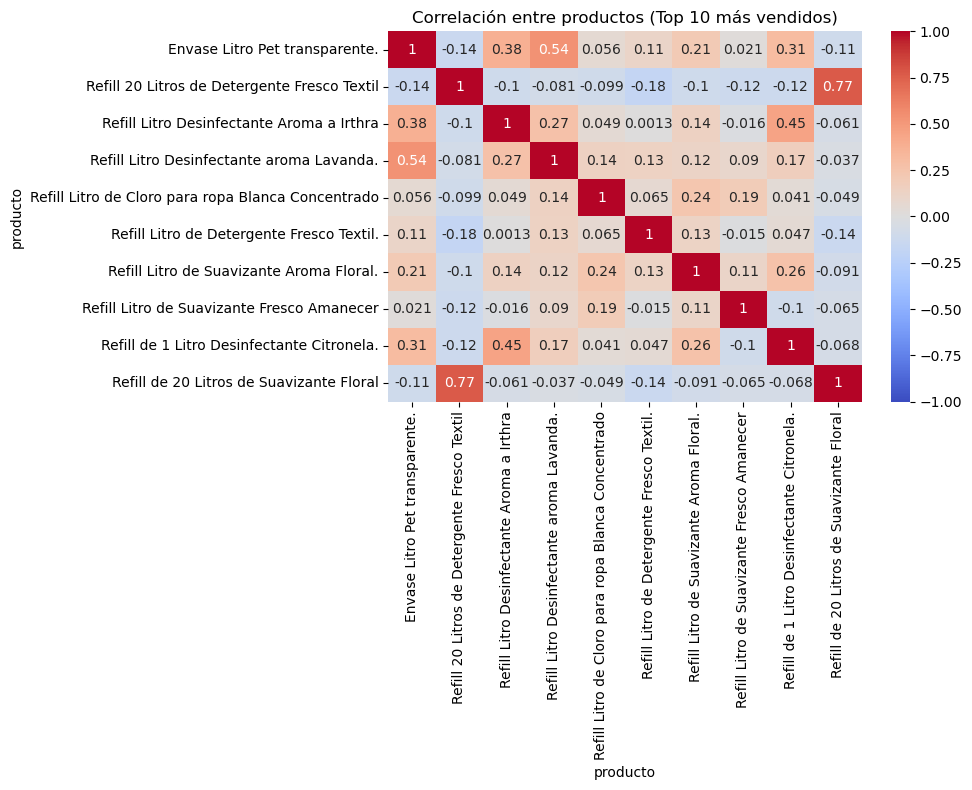

In [16]:
corr_matrix = df_pivot.corr(method='pearson')

# ---------- 6. Graficar heatmap ----------
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación entre productos (Top 10 más vendidos)')
plt.tight_layout()
plt.show()